# Decision Trees for Regression and Classifications

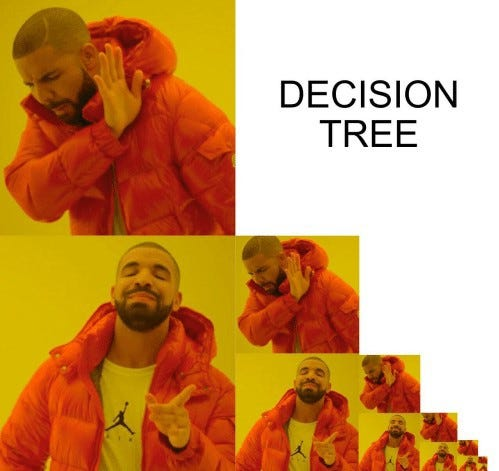

- Decision trees can be used both for regression and classification problems
- They work with stratifying or segmenting the predictor space into a number of binary decisions to make the prediction. Each binary split consists of a decision rule which either sends us left or sends us right. This is the basic structure of a decision tree:
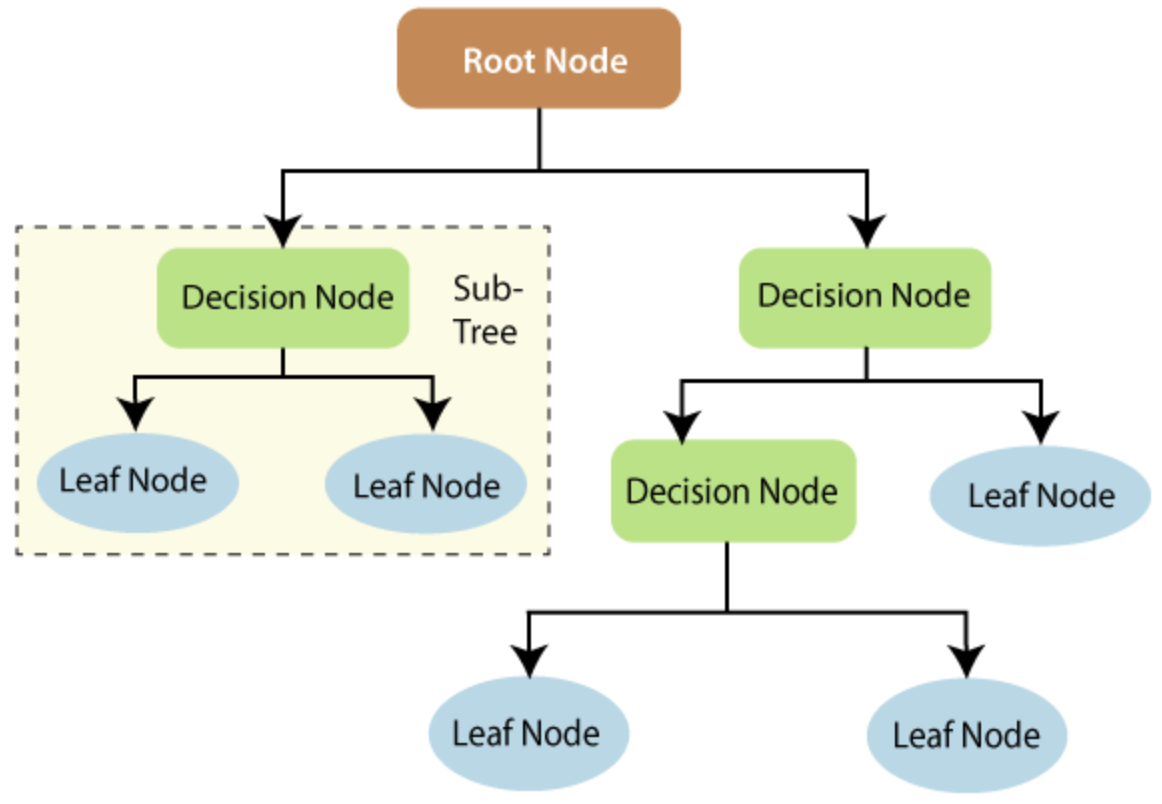

- These are not as competitive as algorithms including random forests, bagging and boosting, which comprise of building hundreds or thousands of trees and then aggregating the results to yield a single prediction. We will take a look at these methods later. But decision trees form the basis of those aforementioned algorithms.

More info here: https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

## Decision Trees for Regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [5]:
diabetes=load_diabetes()

In [6]:
X=diabetes.data
y=diabetes.target

In [7]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42)

In [38]:
regressor=DecisionTreeRegressor()

regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"MSE :{mse}")
print(f"R2 Score: {r2}")

MSE :0.5167271199414002
R2 Score: 0.6056749239958219


In [11]:
regressor.score(X_test,y_test)

0.06708615839335319

### Activity
Conduct the same regression using OLS. Compare R and MSE scores.

## Decision Trees for Classification


In [40]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [42]:
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
model.score(X_test, y_test)

0.96

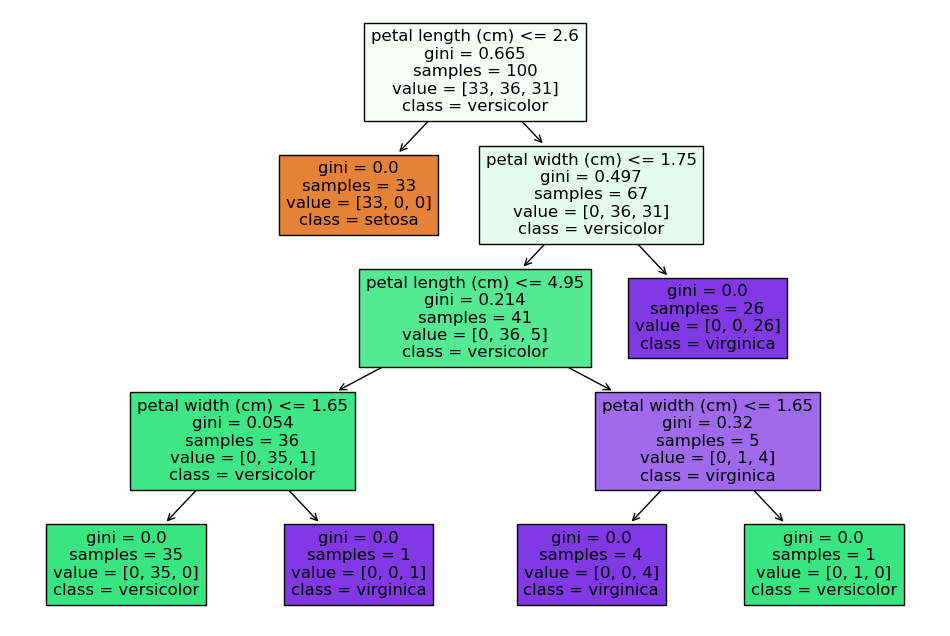

In [50]:
iris_names=iris.target_names.tolist()

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris_names)
plt.show()

In [55]:
pred = model.predict(X_test)
pred

array([2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2,
       0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2,
       2, 2, 2, 2, 0, 0])

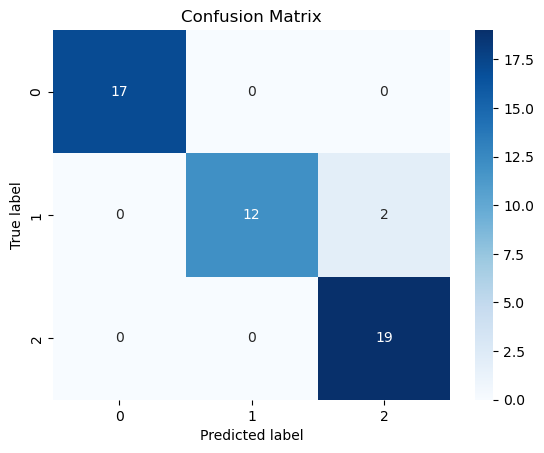

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Obtener la matriz de confusión
cm = confusion_matrix(y_test, pred)

#Crear un mapa de calor para visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#Agregar etiquetas y títulos
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")

#Mostrar la matriz de confusión
plt.show()

## Key model parameters in a decision tree

We just implemented decision trees for classification and regression. When we initialized the model, we did not pass any arguments to the function. We chose to work with default parameters. However there is a bunch of parameters that sklearn provides. These parameters can be adjusted to better suit our requirement and to the data, to improve efficiency and accuracy of the model. You can check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

The main parameters are:

- `criterion{“gini”, “entropy”}, default=”gini”` - Defines the criteria for decision split, ie., `gini` index vs. entropy.
- `min_samples_split: int or float, default=2` - This is the minimum number of training samples at a decision split point, if it is to be further split into children nodes.
- `min_samples_leaf: int or float, default=1` - This is the minimum number of training samples at a decision split point, if it is to be further split into leaf nodes.
  :exclamation: Note for instructor: `min_samples_split` and `min_samples_leaf`, they look very similar but difference is between children node and leaf node. Children node can be split further while a leaf node can't be.
- `max_depthint, default=None` - Defines the maximum depth of the tree. Each level of the decision split can be thought about as a depth level where the root node signifies level 0, next internal node as level 1 and so on and so forth.
- `max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None` - This defines the maximum number of features to pick up every time when comparing the `gini` index or the entropy criteria for choosing the feature to make the split decision.

### Activity
Go through article and read more about parameters and **hyperparemeters tuning**: [Decision Tree](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680).


# Cross Validation

When we built regression tree model and classification tree model, we observed that every time we ran the algorithm it gave us a slightly different result.
  
- To achieve a better estimate of the _result/accuracy/performance_ of the model, we perform cross validation which basically repeats the process a number of times by randomly shuffling the dataset and fitting the model and checking the accuracy. 

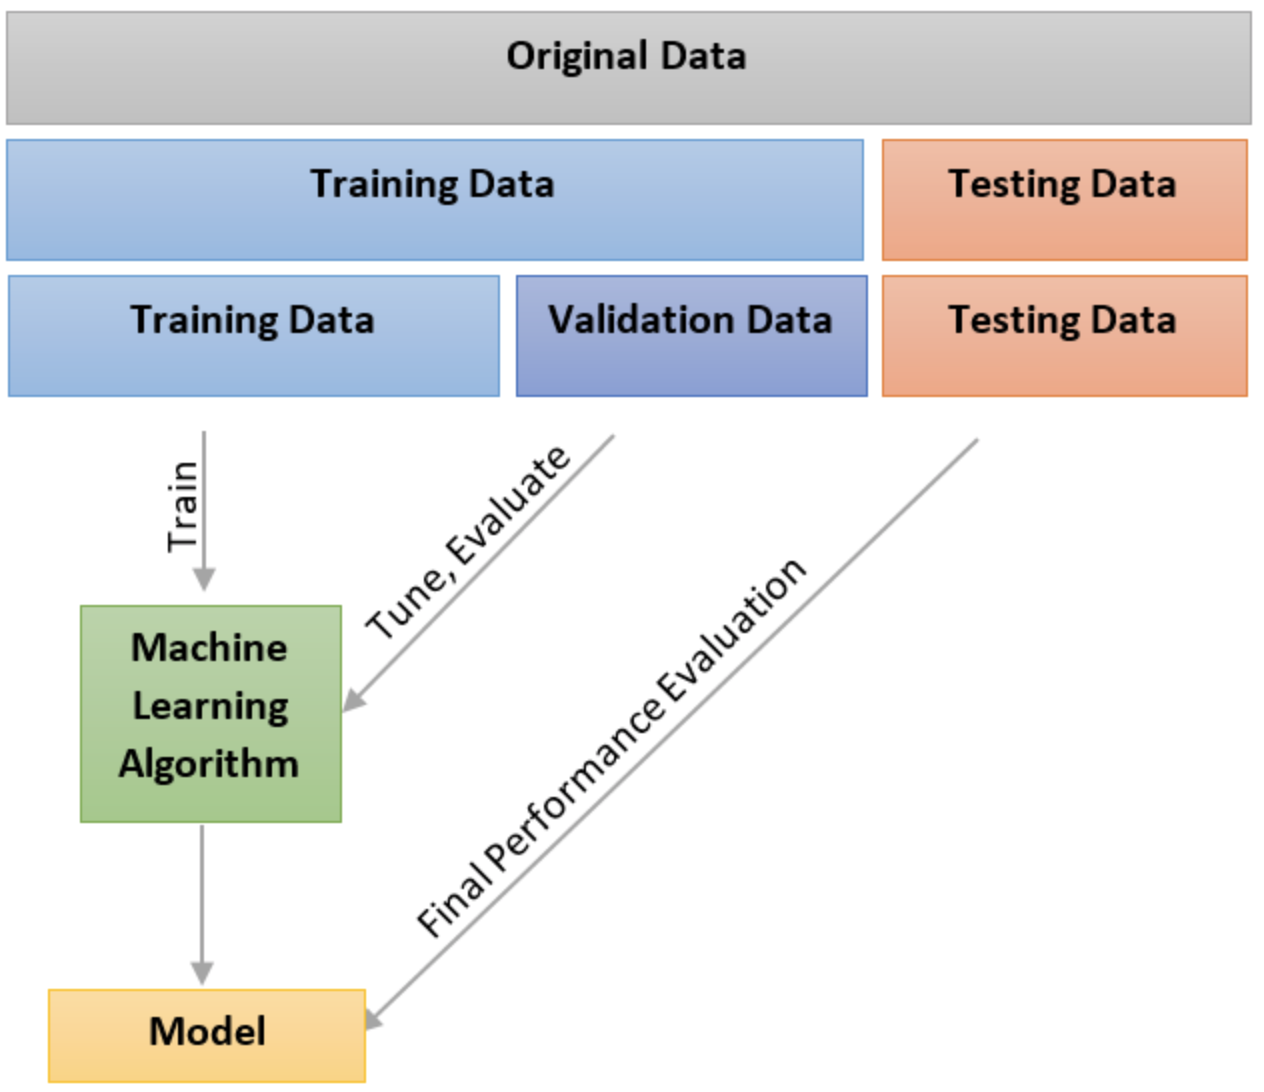

## Leave One Out Cross Validation

- This method involves splitting the training data into two parts:

  - a single observation for eg. `(x1,y1)` that is used for the validation set, and
  - the remaining observations `{(x2, y2), . . . , (xn, yn)}` that are used for training the model. Model accuracy is calculated for this data now.

- After this, another row is picked as validation set and the rest of the information for training the model. Model accuracy is calculated
- This process is repeated 'n' number of times.
- Average of all the accuracy measures is taken to get the final estimate

- One disadvantage with this method is that, since we are calculating the MSE for only observation at a time, the result is a poor estimate as it is by nature highly variable: 

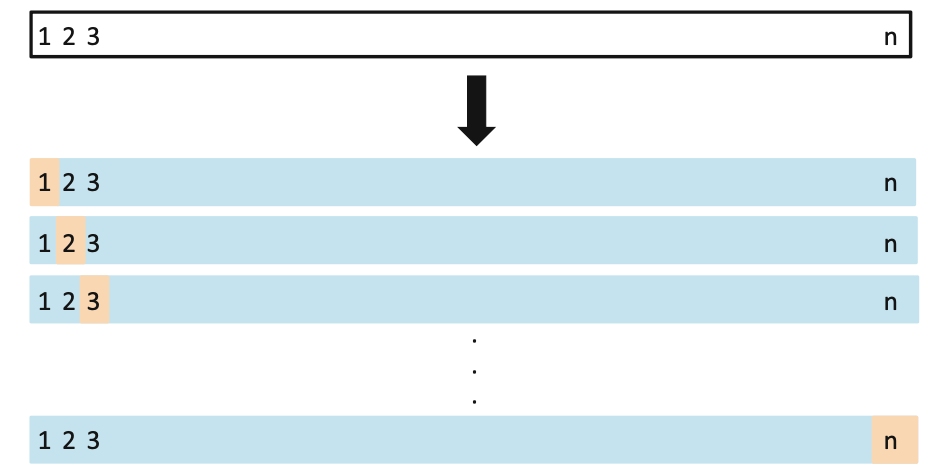

## K Fold Cross Validation

- This method involves splitting the data randomly into `k` groups/folds, of approximately equal size. The first fold is treated as a validation set, and the model is fit on the remaining `k − 1` folds, which is our remaining data. The mean squared error, MSE, is then computed on the observations in the held-out/validation fold.
- After this, another fold is picked as validation set and the rest of the information for training the model. Model accuracy is calculated.
- This process is repeated `k` number of times, ie., once for each fold.
- Average of all the accuracy measures is taken to get the final estimate.
- Typically, given these considerations, one performs k-fold cross-validation using `k = 5` or `k = 10`, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.
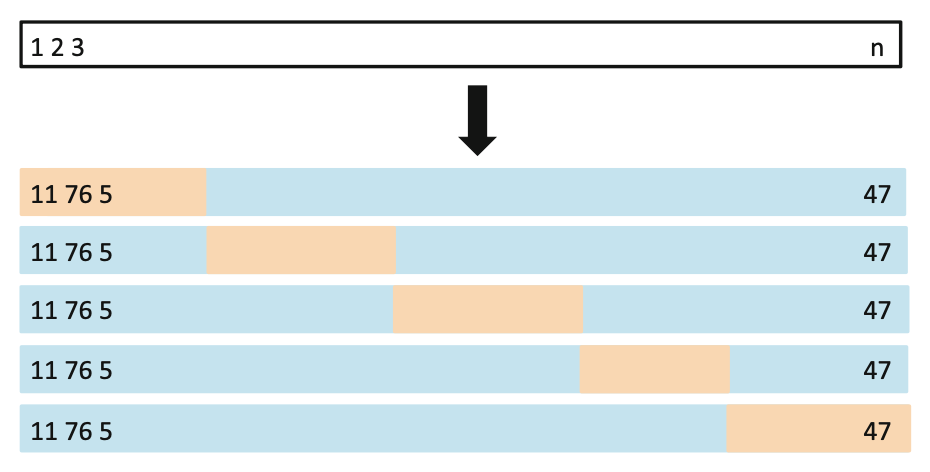

In [26]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [27]:
X, y = fetch_california_housing(return_X_y=True)
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = DecisionTreeRegressor()

In [29]:
cross_val_score(model, X_train, y_train, cv=10)

array([0.57360905, 0.61061393, 0.5918067 , 0.62131438, 0.60681893,
       0.58402026, 0.57235373, 0.54659604, 0.58832355, 0.61727855])

As we have discussed earlier, no one model is the better than the other. It depends on the data. Hence we will try out some different models and select the model that performs the best on the given data.

In [31]:
model1 = DecisionTreeRegressor()

from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()

import numpy as np

# We can use the result to choose the best performing model

In [32]:
model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)


{'Regression Tree': 0.5833282309370175, 'Linear Regression': 0.5562102373991927, 'KNN': 0.12132289739464266}


### Activity

In this exercise we will go back to the customer churn data from the last lab.

- Implement cross validation along with logistic regression and decision tree classifier on the data

- Create a pipeline as shown in the class example

Note: you can directly use the upsampled data from SMOTE technique. You can use the following code to set up for this activity:

In [34]:
import pandas as pd 
import numpy as np 
pd.set_option('display.max_columns', None) 
import warnings 
warnings.filterwarnings('ignore')

churnData = pd.read_csv('lab-8.5/Customer-Churn.txt') 
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce') 
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE 

smote = SMOTE() 

X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']] 
transformer = StandardScaler().fit(X) 
X = transformer.transform(X) 

y = churnData['Churn'] 

X_sm, y_sm = smote.fit_resample(X, y) 
y_sm.value_counts()

FileNotFoundError: [Errno 2] No such file or directory: 'lab-8.5/Customer-Churn.txt'